<a href="https://colab.research.google.com/github/kimsoohwa/jejumaster/blob/main/%EA%B3%BC%EC%A0%9C1_%EA%B9%80%EC%88%98%ED%99%94_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#@@전기차 충전기 현황 데이터를 이용한 탐색적 데이터 분석

#**1.데이터 분석 주제**: 전기차를 구매하려고 고민중에 전기차가 많은 제주이지만, 육지로 이사간다면 육지에도 제주만큼 전기차 충전소가 있을까??


###데이터 수집,다운로드하기

- https://www.data.go.kr/data/15061259/fileData.do
- 한국환경공단_전기차 충전기 현황_환경부 공공급속충전기.csv 다운로드하기
- ('한국환경공단_전기차 충전기 현황' 줄여서 이름 변경함)
-2022년도 지역별로 나온 자료가 있지만 데이터 건수가 100개 이상이되지 않아 2021년도에 제공된 자료에서 추출하여 이용)

In [ ]:
PATH = './sample_data/' #./ 현재 위치라는 뜻
FILE = '한국환경공단_전기차 충전기 현황.csv'

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 코랩에서 위 코드를 실행시킨 후  반드시 코랩 메뉴: "런타임>런타임 다시 시작" 합니다.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import pandas  as pd
import numpy as np
import matplotlib as plt
print(pd.__version__)
print(np.__version__)
print(plt.__version__)

1.5.3
1.23.5
3.7.1


###데이터 불러오기

In [ ]:

import pandas as pd

PATH = './sample_data/' #./ 현재 위치라는 뜻
FILE = '한국환경공단_전기차 충전기 현황.csv'

file = PATH+FILE
df = pd.read_csv(file, encoding = 'cp949') #cp949: 윈도우OS 기본 인코딩 포맷
df.head()

,지역,충전소명,충전기ID,설치년도,주소
0,서울특별시,종묘 공영주차장,1,2012,"서울특별시 종로구 종로 157, 지하주차장 4층 하층 T구역"
1,서울특별시,세종로 공영주차장,1,2014,"서울특별시 종로구 세종대로 189, 지하주차장 4층 D구역 계단실 앞"
2,서울특별시,그랜드앰배서더 서울,1,2014,"서울특별시 중구 동호로 287, 대형버스주차장"
3,서울특별시,한강진역 공영주차장,1,2012,"서울특별시 용산구 한남동 산10-84, 지상실외주차장"
4,서울특별시,기아차 성동서비스센터,1,2012,"서울특별시 성동구 성수이로26길 61, 지상주차장 입구 좌측 경비실 옆"


###**데이터 전처리 가공하기**

In [ ]:
# 데이터 요약 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      3773 non-null   object
 1   충전소명    3773 non-null   object
 2   충전기ID   3773 non-null   int64 
 3   설치년도    3773 non-null   int64 
 4   주소      3773 non-null   object
dtypes: int64(2), object(3)
memory usage: 147.5+ KB


In [ ]:
df.describe()

,충전기ID,설치년도
count,3773.000000,3773.000000
mean,8.295521,2017.617016
std,11.523611,1.586628
min,1.000000,2010.000000
25%,1.000000,2017.000000
50%,1.000000,2018.000000
75%,12.000000,2018.000000
max,54.000000,2019.000000


In [ ]:
!pip install missingno

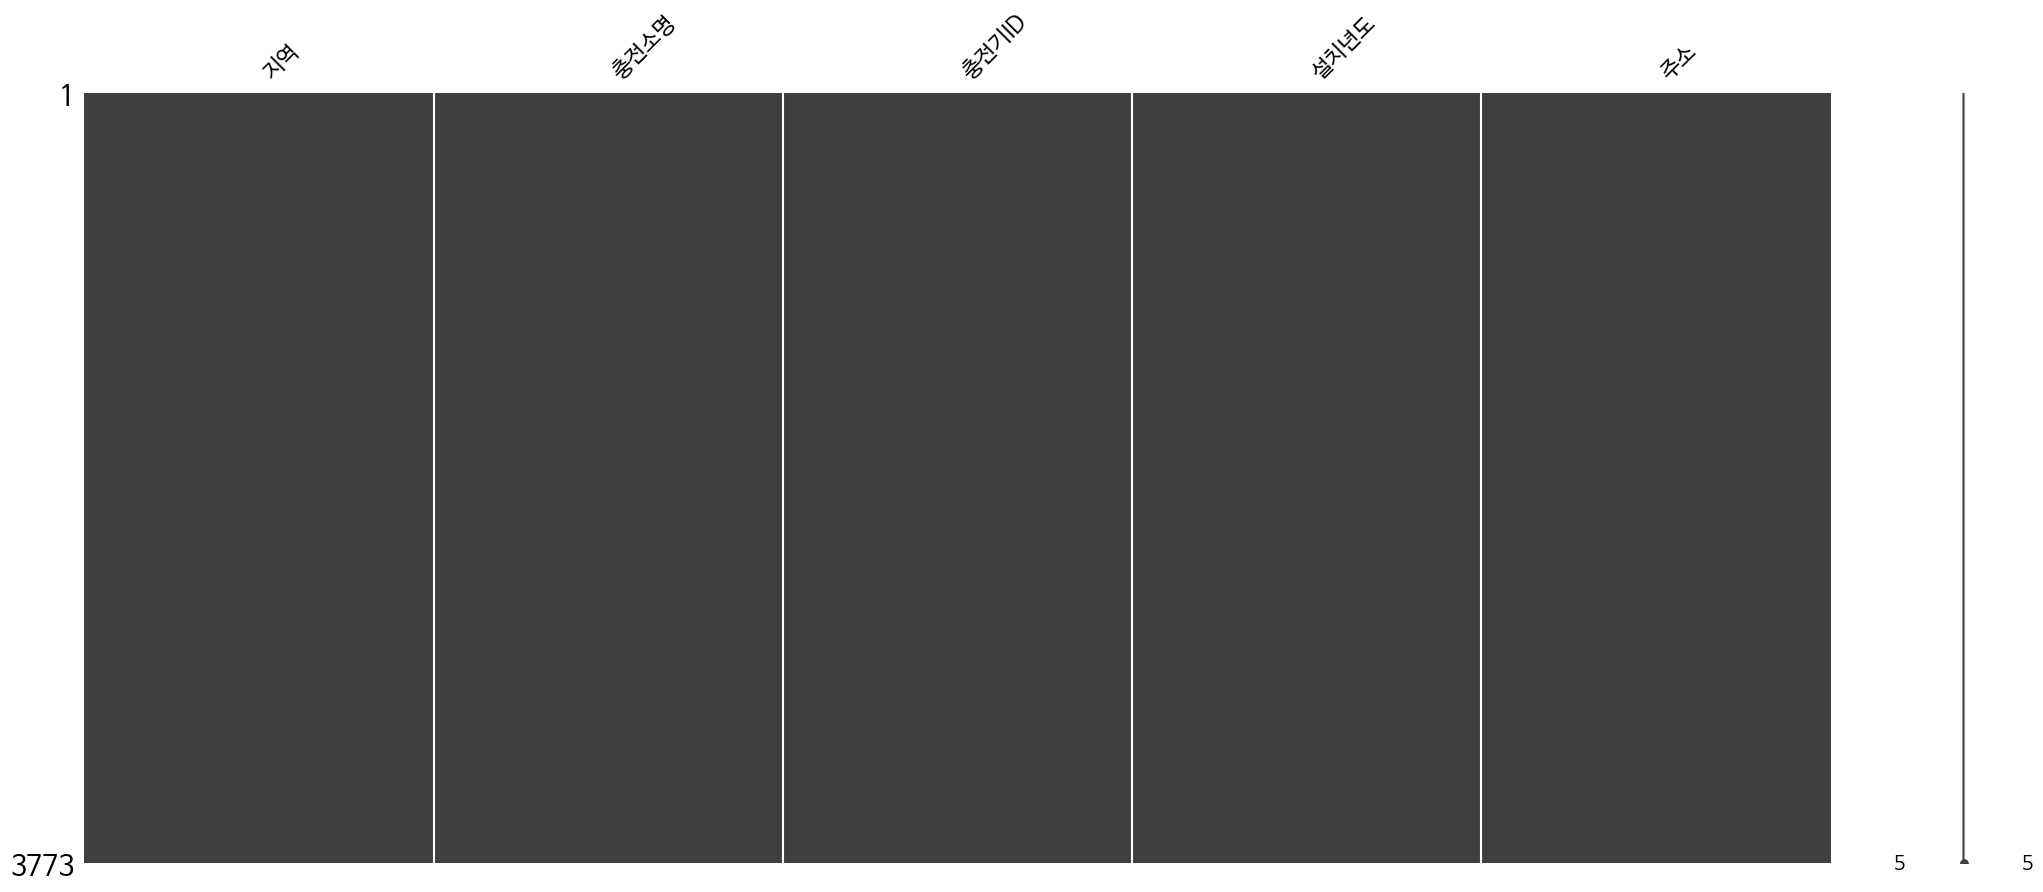

In [ ]:
#행의 결측데이터 시각화
import missingno as msno
import matplotlib.pyplot as plt

# 코랩에서 한글 폰트 설치한 후 사용하기!!!
# plt.rc('font', family='cmb10')                  # (코랩)한글 폰트
plt.rc('font', family='NanumBarunGothic')       # (코랩)한글 폰트
# plt.rc('font', family='Malgun Gothic')          # (win)한글 폰트

msno.matrix(df)
plt.show()

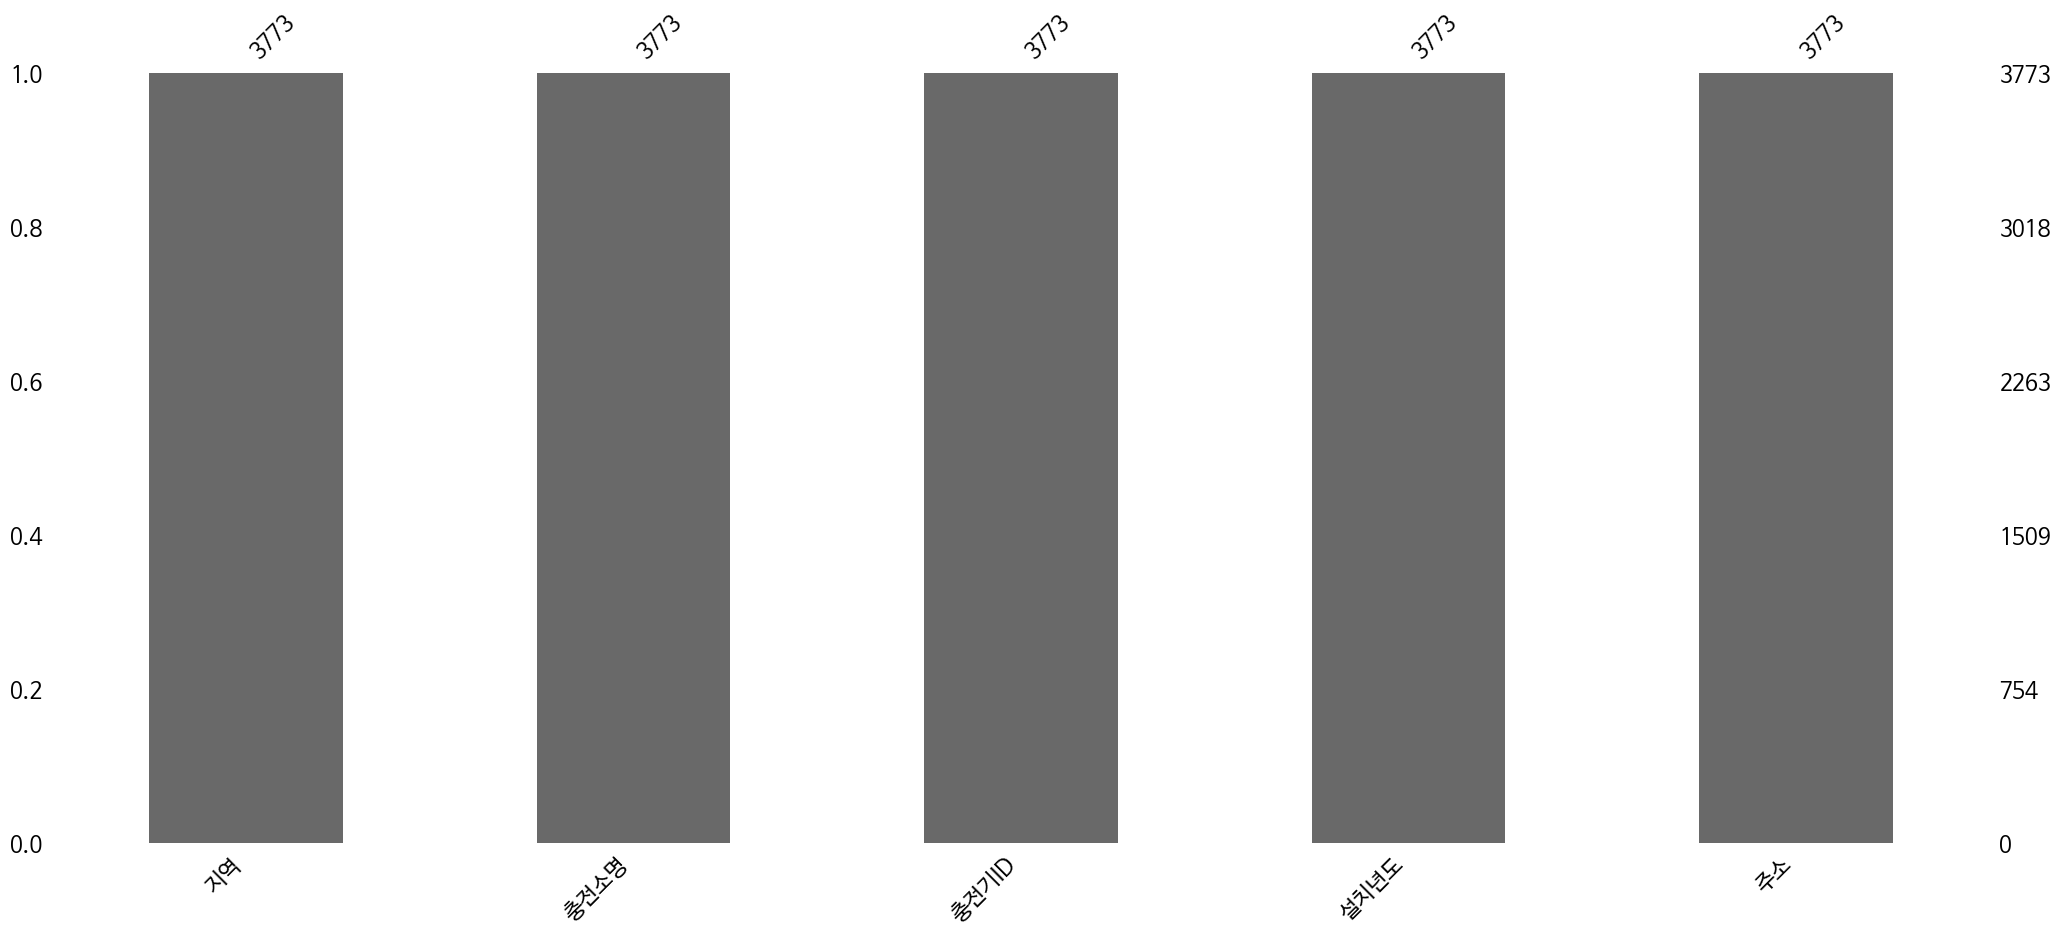

In [ ]:
#열의 결측데이터
msno.bar(df)
plt.show()

-결측 데이터 존재하지 않음

### 데이터 전처리하기(pre-processing) : 필요한 데이터만 추출하기

-컬럼이름 출력

In [ ]:
# 현재 컬럼이름 출력하기
df.columns #열

Index(['지역', '충전소명', '충전기ID', '설치년도', '주소'], dtype='object')

**-필요없는 컬럼 삭제**

In [ ]:
df.drop('충전기ID', axis=1, inplace=True)
df.head(3)

,지역,충전소명,설치년도,주소
0,서울특별시,종묘 공영주차장,2012,"서울특별시 종로구 종로 157, 지하주차장 4층 하층 T구역"
1,서울특별시,세종로 공영주차장,2014,"서울특별시 종로구 세종대로 189, 지하주차장 4층 D구역 계단실 앞"
2,서울특별시,그랜드앰배서더 서울,2014,"서울특별시 중구 동호로 287, 대형버스주차장"


In [ ]:
#지역이름만 출력
set(df['지역'])


{'강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '인천광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도'}

In [ ]:
print( '#지역 갯수: ', len( set(df['지역']) ) )
print( '#지역명: ', set( df['지역'] ) )
print( '#충전소명 갯수: ', len( set(df['충전소명']) ) )
print( '#충전소명: ', set( df['충전소명'] ) )

#지역 갯수:  17
#지역명:  {'대구광역시', '전라북도', '강원도', '인천광역시', '전라남도', '경상남도', '경상북도', '대전광역시', '세종특별자치시', '경기도', '충청남도', '충청북도', '제주특별자치도', '광주광역시', '서울특별시', '울산광역시', '부산광역시'}
#충전소명 갯수:  2378
#충전소명:  {'고잔동무료주차장', '이마트 파주운정점', '언양공영주차장', '오산휴게소(동탄방향)', '냉천길 공영주차장', '한국도로공사원주지사', '갈말읍사무소 주차장', '풍물시장 주차타워', '금산세계인삼엑스포', '내남면사무소', '롯데마트 덕진점', '차황면사무소주차장', '구지면사무소', '한국광기술원', '양산시청', '진영휴게소(부산방향)', '롯데마트 장암점', '동작주차공원 공영주차장', '철원종합문화복지센터', '스포츠파크 주차장', '운수면사무소(주차장 내)', '현동면사무소', '충현동 제1공영주차장', '하남벤처센터', '홈플러스 마산점', '안천면사무소 주차장', '목원대학교', '화성시청', '가곡면 행복문화센터', '함양문화시설사업소', '정읍시 제2청사 주차장', '울산도서관', '목화휴게소', '땅끝 해남 식품 특화단지', '순천시문화건강센터', '광양만권경제자유구역청', '대전테크노파크 주차장', '삼국유사 가온누리', '하장면사무소', '강동동 주민센터', '민속마을 주차장', '동이면사무소', '삼례시장 주차장', '설악항 공영주차장', '대구지방합동청사', '마장동사무소 앞(공중전화부스)', 'Park M (주차복합빌딩)', '모종동 제1공영주차장', '서귀포항 해운항만과 사무실', '통진두레문화센터', '당진문예의전당', '주산면사무소 주차장', '영해보건지소', '참살이조가비촌', '상당구청', '영암국제자동차경주장(P4)', '탕정면사무소', '하남미사 근린공원16호 주차장', '고인돌공원 주차장', '월악산국립공원사무소 단양분소', '정읍휴게소(순천방향)', '유카스주유소', '방어동

In [ ]:
#특정 조건 필터링 지역중에 제주특별자치도
df.query(" 지역 == '제주특별자치도' ")

,지역,충전소명,설치년도,주소
300,제주특별자치도,제주도청 1청사,2011,제주특별자치도 제주시 문연로 6 제주특별자치도청
301,제주특별자치도,제주시청,2013,"제주특별자치도 제주시 광양9길 10, 제주시청 입구 좌측 주차장"
302,제주특별자치도,제주도청 제2청사,2013,"제주특별자치도 제주시 문연로 30, 제주도청 제2청사 입구 좌측 본관 주차장"
303,제주특별자치도,제주애월읍사무소,2012,"제주특별자치도 제주시 애월읍 일주서로 6322, 본관 주차장"
304,제주특별자치도,구좌읍사무소,2013,제주특별자치도 제주시 구좌읍 일주동로 3116
...,...,...,...,...
3437,제주특별자치도,제주4.3평화재단 공원,2019,제주특별자치도 제주시 명림로 430
3438,제주특별자치도,제주국제대학교,2019,제주특별자치도 제주시 516로 2870
3439,제주특별자치도,제주국제대학교,2019,제주특별자치도 제주시 516로 2870
3440,제주특별자치도,제주국제대학교,2019,제주특별자치도 제주시 516로 2870


-지역별로 충전기 수 구하기

In [ ]:
df_area_total=df['지역'].value_counts()
df_area_total

경기도        455
경상북도       449
전라남도       361
강원도        355
경상남도       277
충청남도       277
서울특별시      253
제주특별자치도    253
전라북도       244
충청북도       232
인천광역시      120
울산광역시      110
대구광역시      105
대전광역시       95
부산광역시       85
광주광역시       68
세종특별자치시     34
Name: 지역, dtype: int64

###**전처리된 최종 결과 csv저장**

In [ ]:
#지역별 합계까지 출력 후 데이터 프레임처리
import pandas as pd

PATH = './sample_data/'
FILE = '한국환경공단_전기차 충전기 현황.csv'

file = PATH + FILE
df = pd.read_csv(file, encoding='cp949')

df.columns

df_area_total = df['지역'].value_counts()

# DataFrame으로 변환
df_area_total = df_area_total.reset_index()

df_area_total.columns = ['지역', '충전기 수(대)']

# 결과 출력
df_area_total


,지역,충전기 수(대)
0,경기도,455
1,경상북도,449
2,전라남도,361
3,강원도,355
4,경상남도,277
5,충청남도,277
6,서울특별시,253
7,제주특별자치도,253
8,전라북도,244
9,충청북도,232


1.

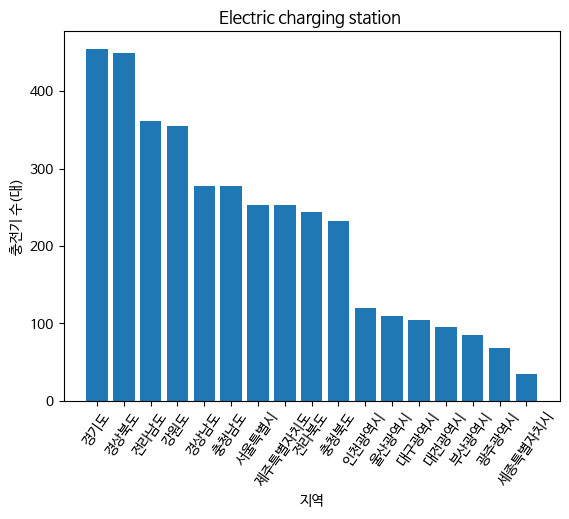

In [ ]:
import matplotlib.pyplot as plt

# 코랩에서 한글 폰트 설치한 후 사용하기!!!
# plt.rc('font', family='cmb10')                  # (코랩)한글 폰트
plt.rc('font', family='NanumBarunGothic')       # (코랩)한글 폰트
# plt.rc('font', family='Malgun Gothic')          # (win)한글 폰트


# 1.그래프 데이터 지정하기(X축, Y축)
x = df_area_total ['지역']

y = df_area_total['충전기 수(대)']

# 2.그래프 그리기
plt.bar(x, y)

# 3. 그래프 꾸미기
# plt.title('지역별 전기차 충전기 수 ') # 그래프 제목
plt.title('Electric charging station ') # 그래프 제목
plt.xlabel('지역')                    # x축 이름
plt.ylabel('충전기 수(대)')                  # y축 이름
plt.xticks(rotation = 55, fontsize=10)             # X축 레이블 회전
plt.show()

2.

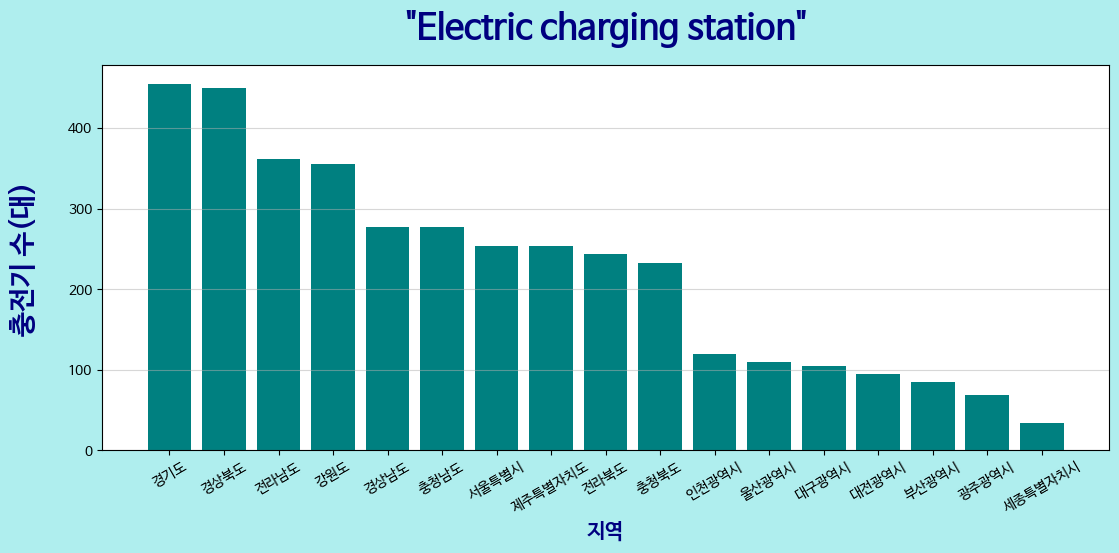

In [ ]:
import matplotlib.pyplot as plt

# 1.그래프 데이터 지정하기(X축, Y축)
x = df_area_total ['지역']
y = df_area_total['충전기 수(대)']

# 2.그래프 그리기
plt.figure(figsize = (13, 5), facecolor = 'paleturquoise') # 그래프 크기와 색상
plt.bar(x, y, color = 'teal')  # 막대 그래프 그리기

# 3. 그래프 꾸미기
plt.title('"Electric charging station"', pad = 20,                # 그래프 제목
          fontdict = {'size':25, 'color':'navy', 'weight':'bold'})
plt.xlabel('지역', fontdict = {'size': 15, 'color': 'navy', 'weight': 'bold'})
plt.ylabel('충전기 수(대)', fontdict = {'size': 20, 'color': 'navy', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 30)                   # X축 레이블 회전
plt.grid(True, axis = 'y', alpha = 0.5)    # 그래프에 그리드 표현하기

plt.show() # 그래프 그리기

선그래프 시각화하기

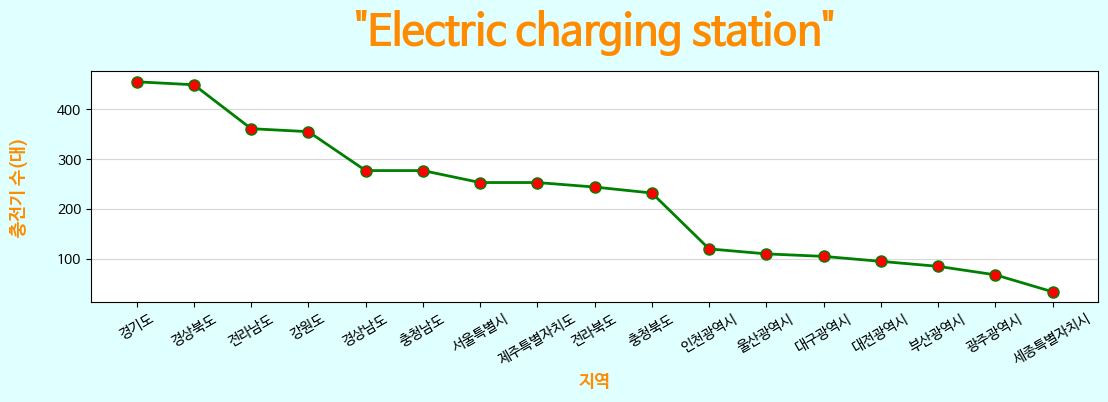

In [ ]:
# 1.그래프 데이터 지정하기(X축, Y축)
x = df_area_total ['지역']
y = df_area_total['충전기 수(대)']

# 2.그래프 그리기 (선그래프 그리기)
plt.figure(figsize = (13, 3), facecolor = 'lightcyan') # 그래프 크기와 색상
plt.plot(x, y, color='green', marker='o', linestyle='solid',
         linewidth=2, markersize=8, markerfacecolor='red')

# 3. 그래프 꾸미기
plt.title('"Electric charging station"', pad = 20,                # 그래프 제목
          fontdict = {'size':30, 'color':'darkorange', 'weight':'bold'})
plt.xlabel('지역', fontdict = {'size': 13, 'color': 'darkorange', 'weight': 'bold'})
plt.ylabel('충전기 수(대)', fontdict = {'size': 13, 'color': 'darkorange', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 30)                   # X축 레이블 회전
plt.grid(True, axis = 'y', alpha = 0.5)    # 그래프에 그리드 표현하기

plt.show() # 그래프 그리기

혼합그래프

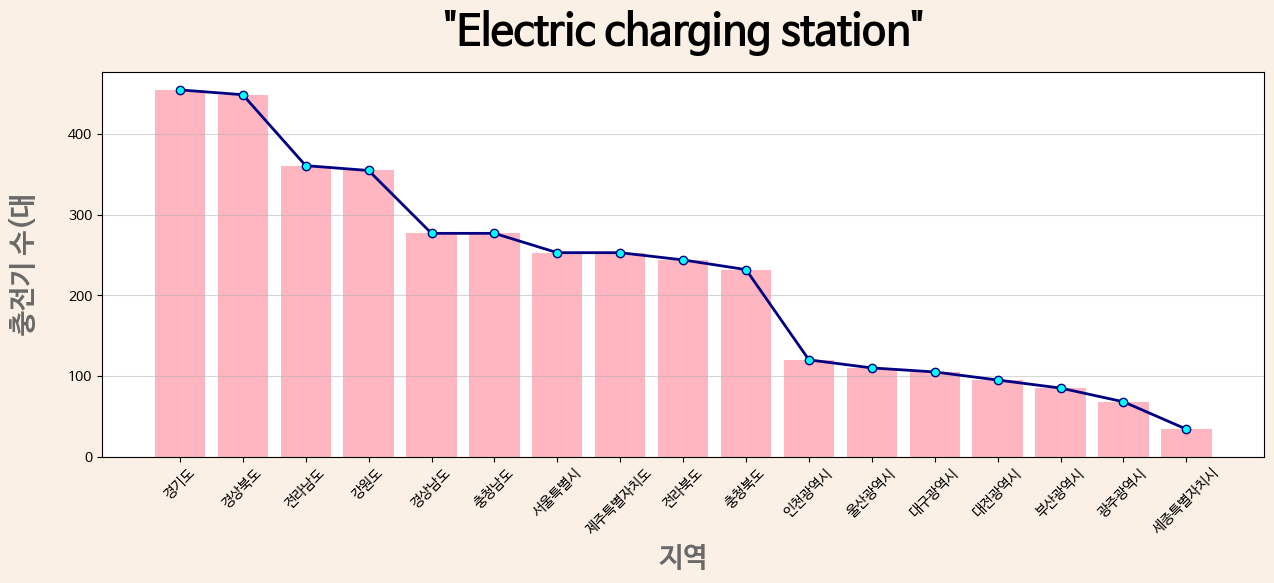

In [ ]:
import matplotlib.pyplot as plt


# 1.그래프 데이터 지정하기(X축, Y축)
x = df_area_total ['지역']
y = df_area_total['충전기 수(대)']

# 2.그래프 그리기
plt.figure(figsize = (15, 5), facecolor = 'linen') # 그래프 크기와 색상
plt.bar(x, y, color = 'lightpink')          # 막대 그래프
plt.plot(x, y, color='navy', marker='o',  # 선 그래프
         linewidth=2, markerfacecolor='aqua')

# 3.그래프 꾸미기
plt.title('"Electric charging station"', pad = 20,                # 그래프 제목
          fontdict = {'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('지역', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'})
plt.ylabel('충전기 수(대', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)                 # X축 레이블 회전
plt.grid(True, axis = 'y', alpha = 0.5)  # 그래프에 그리드 표현하기

plt.show() # 그래프 그리기

**원그래프로 시각화**

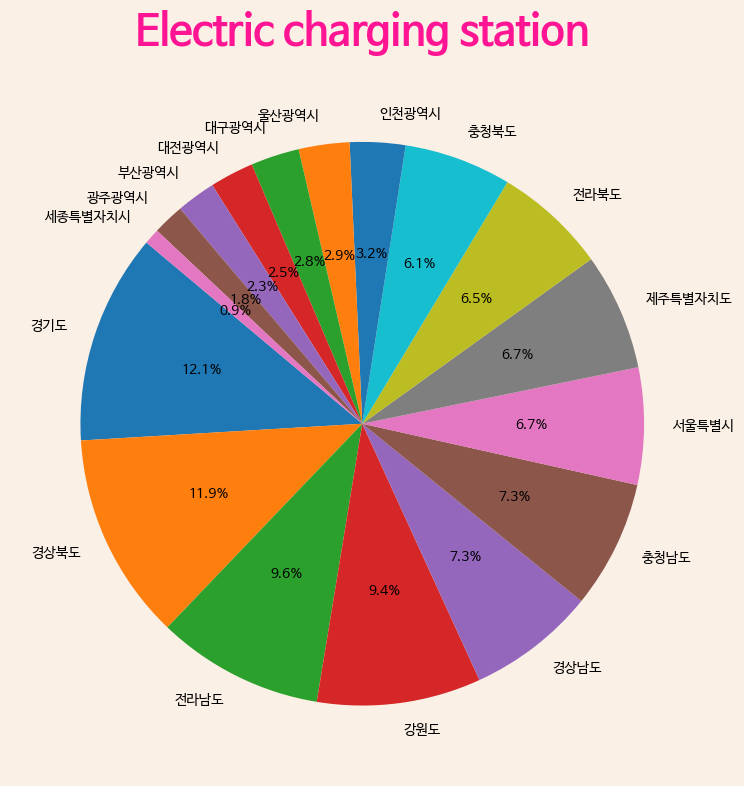

In [ ]:
import matplotlib.pyplot as plt

# 데이터 예시 (레이블과 해당 비율)
labels = df_area_total['지역']
sizes = df_area_total['충전기 수(대)']
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightyellow']

# 원 그래프 그리기
plt.figure(figsize=(20, 20), facecolor='linen')  # 그래프 크기와 색상
plt.subplot(122)  # 두 개의 서브플롯 중 두 번째 (원 그래프)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)  # 파이 차트 생성

plt.title('Electric charging station', pad=20,  # 파이 차트 제목
          fontdict={'size': 30, 'color': 'deeppink', 'weight': 'bold'})

plt.show()  # 그래프 그리기

**워드클라우드로 시각화하기**

In [ ]:
!pip install wordcloud

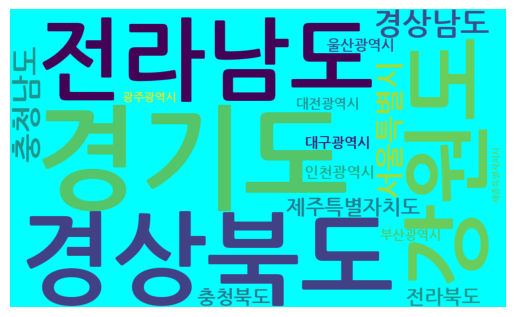

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. (win)폰트 지정: 자신의 컴퓨터 환경에 맞는 한글 폰트 경로
# font_path = 'malgun'  # C:/Windows/Fonts/
# font_path = 'HMFMOLD' # C:/Windows/Fonts/HMKMMAG.TTF     #HMFMOLD.TTF

# 1. (코랩)폰트 지정: 자신의 컴퓨터 환경에 맞는 한글 폰트 경로
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'

# 2.전처리된 데이터 지정하기
names = df_area_total['지역']   # 지역
counts = df_area_total['충전기 수(대)']  #충전기 수
data = dict(zip(names, counts)) # 워드클라우드는 딕셔너리 형태로 만들기

# 3.워드클라우드 그래프로 시각화하기
wc = WordCloud(width = 1000, height = 600,
               background_color="aqua", font_path=font_path)#바탕색을 바꿀 수 있음
plt.imshow(wc.generate_from_frequencies(data))
plt.axis("off")#X,Y축 안나오게 지정
plt.show()

# 4.파일로 저장하기
wc.to_file('./전기차충전소_워드클라우드.png')#이미지가 저장됨

**데이터 파일로 저장하기**

In [ ]:
# 파일명 지정하여 저장하기
file = './sample_data/Electric charging station.csv'  # 파일명
df_area_total.to_csv(file, encoding = 'UTF-8', mode = 'w') # 파일 저장하기

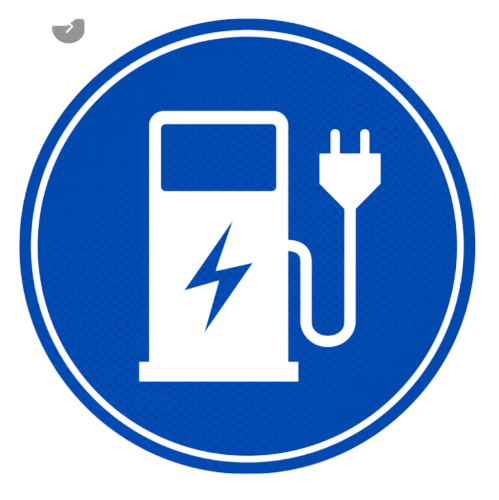
#선그래프와 ,원그래프로 한눈으로 봐도
#육지 지역들이 제주도에 비해 전기차 충전소가 적지 않다.#
#전기차를 사고 육지로 이사간다해도 이용에는 어려움이 없을듯한 결론!!!! #